In [7]:
from sklearn.naive_bayes import GaussianNB
from nilearn.input_data import NiftiMasker
import pickle
import numpy as np
from nilearn.image import new_img_like, load_img
from nilearn import image
from nilearn.plotting import plot_stat_map, plot_img, show
from nilearn import plotting
from sklearn.naive_bayes import GaussianNB
from nilearn.input_data import NiftiMasker
from nilearn.plotting import plot_glass_brain, plot_stat_map
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# loading the objects:
f = open('../data/searchlight.pkl', 'rb')
searchlight, searchlight.scores_ = pickle.load(f)
f.close()

mask_wb_filename='../InSpePosNegData/BIDS_2023E/derivatives/sub-0118/anat/sub-0118_acq-T1sequence_run-1_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'
anat_filename='../InSpePosNegData/BIDS_2023E/derivatives/sub-0118/anat/sub-0118_acq-T1sequence_run-1_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz'
#Load the whole brain mask
mask_img = load_img(mask_wb_filename)

f = open('../data/02_searchlight_prep.pkl', 'rb')
fmri_img_train, fmri_img_test, idx_train,idx_test, conditions_train, conditions_test = pickle.load(f)
f.close()

In [3]:
print('Number of voxels in searchlight: ',searchlight.scores_.size)
#Find the percentile that makes the cutoff for the 500 best voxels
perc=100*(1-500.0/searchlight.scores_.size)
#Print percentile
print('Percentile for 500 most predictive voxels: ',perc)
#Find the cutoff
cut=np.percentile(searchlight.scores_,perc)
#Print cutoff
print('Cutoff for 500 most predictive voxels: ', cut)
#cut=0
#Make a mask using cutoff

#Load the whole brain mask
mask_img2 = load_img(mask_wb_filename)

# .astype() makes a copy.
process_mask2 = mask_img2.get_fdata().astype(int)
process_mask2[searchlight.scores_<=cut] = 0
process_mask2_img = new_img_like(mask_img2, process_mask2)



Number of voxels in searchlight:  8980290
Percentile for 500 most predictive voxels:  99.9944322510743
Cutoff for 500 most predictive voxels:  0.6842364532019705


/tmp/ipykernel_3092/642982622.py:19: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  process_mask2_img = new_img_like(mask_img2, process_mask2)


/work/neuro_4/neuro_env/lib/python3.10/site-packages/numpy/ma/core.py:2820: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


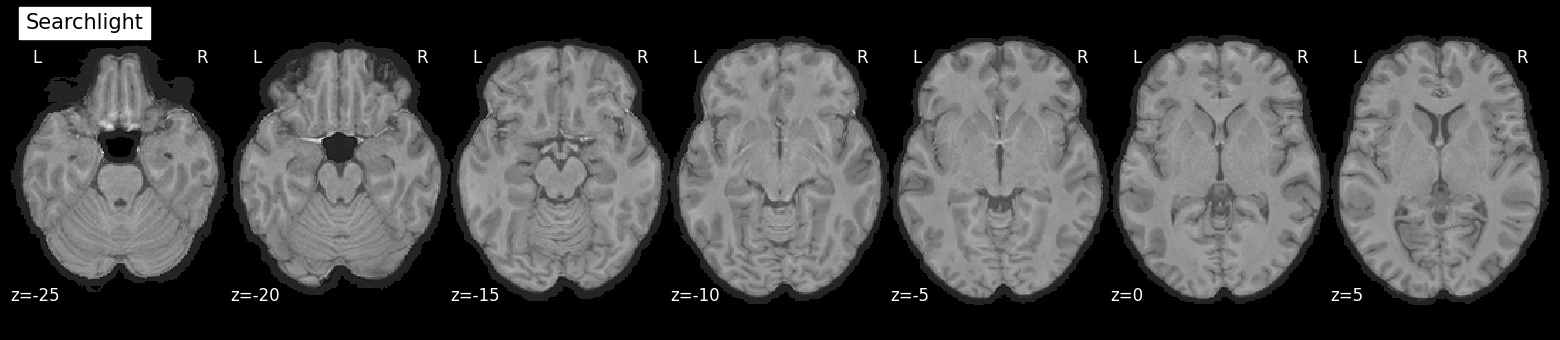

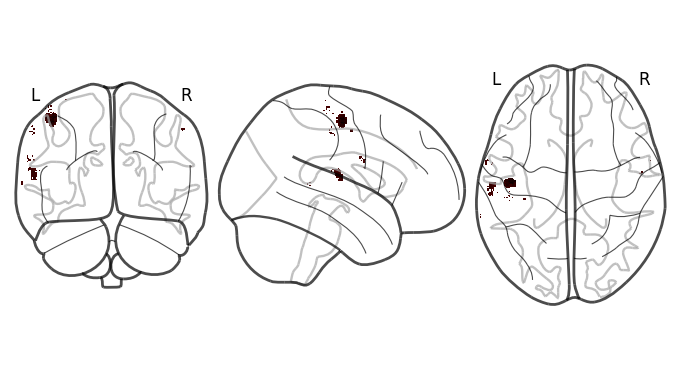

In [4]:
# --------------
from nilearn import image
from nilearn.plotting import plot_stat_map, plot_img, show
from nilearn import plotting
%matplotlib inline
#Create an image of the searchlight scores
searchlight_img = new_img_like(anat_filename, searchlight.scores_)
#Plot the searchlight scores on an anatomical background
plot_img(searchlight_img, bg_img=anat_filename,#bg_img=mean_fmri,
         title="Searchlight", display_mode="z",cut_coords=[-25,-20,-15,-10,-5,0,5],
         cmap='jet', threshold=cut, black_bg=True)
#plotting.plot_glass_brain effects
fig=plotting.plot_glass_brain(searchlight_img,threshold=cut)
fig.savefig("../plots/glass_500_voxels.png", dpi=300)

In [ ]:
from atlasreader import create_output
#create_output(searchlight_img, voxel_thresh=cut, cluster_extent=2,direction='pos')
create_output(searchlight_img, voxel_thresh=cut, cluster_extent=2, direction='pos', outdir='../atlasreader')

In [11]:
pd.read_csv('../atlasreader/atlasreader_peaks.csv')

,cluster_id,peak_x,peak_y,peak_z,peak_value,volume_mm,aal,desikan_killiany,harvard_oxford
0,1.0,-45.0,-14.760,53.895,0.757143,325.494385,Postcentral_L,Unknown,43.0% Left_Precentral_Gyrus; 27.0% Left_Postce...
1,2.0,-59.0,-14.760,10.907,0.718842,98.316486,Temporal_Sup_L,Unknown,55.0% Left_Central_Opercular_Cortex; 14.0% Lef...
2,3.0,54.0,-6.944,48.033,0.707635,5.727174,Precentral_R,ctx-rh-precentral,62.0% Right_Precentral_Gyrus; 23.0% Right_Post...
3,4.0,-60.0,-22.576,46.079,0.705296,5.727174,Parietal_Inf_L,Unknown,50.0% Left_Postcentral_Gyrus; 11.0% Left_Supra...
4,5.0,-63.0,1.849,25.562,0.701355,4.772645,Precentral_L,Unknown,31.0% Left_Precentral_Gyrus
5,6.0,-63.0,-17.691,17.746,0.687438,3.818116,Postcentral_L,Unknown,62.0% Left_Postcentral_Gyrus; 15.0% Left_Centr...
6,7.0,-59.0,-23.553,45.102,0.695197,2.863587,Parietal_Inf_L,Unknown,52.0% Left_Postcentral_Gyrus; 17.0% Left_Supra...
7,8.0,-60.0,-22.576,49.987,0.691256,2.863587,no_label,Unknown,30.0% Left_Postcentral_Gyrus
8,9.0,-34.0,-27.461,70.504,0.690517,1.909058,Postcentral_L,Unknown,44.0% Left_Postcentral_Gyrus; 22.0% Left_Prece...
9,10.0,-46.0,-25.507,65.619,0.690640,1.909058,Postcentral_L,Unknown,29.0% Left_Postcentral_Gyrus


In [ ]:

from sklearn.naive_bayes import GaussianNB
from nilearn.input_data import NiftiMasker
masker = NiftiMasker(mask_img=process_mask2_img, standardize=False)

# We use masker to retrieve a 2D array ready
# for machine learning with scikit-learn
fmri_masked = masker.fit_transform(fmri_img_test)
#Print size of matrix (images x voxels)
print(fmri_masked.shape)

from sklearn.model_selection import permutation_test_score
score_cv_test, scores_perm, pvalue= permutation_test_score(
    GaussianNB(), fmri_masked, conditions_test, cv=10, n_permutations=1000, 
    n_jobs=-1, random_state=0, verbose=0, scoring=None)
print("Classification Accuracy: %s (pvalue : %s)" % (score_cv_test, pvalue))



/work/neuro_4/neuro_env/lib/python3.10/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(


(72, 498)
Classification Accuracy: 0.7267857142857144 (pvalue : 0.001998001998001998)


In [ ]:

# Saving the objects:
f = open('../data/05_permutation.pkl', 'wb')
pickle.dump([score_cv_test, scores_perm, pvalue], f)
f.close()

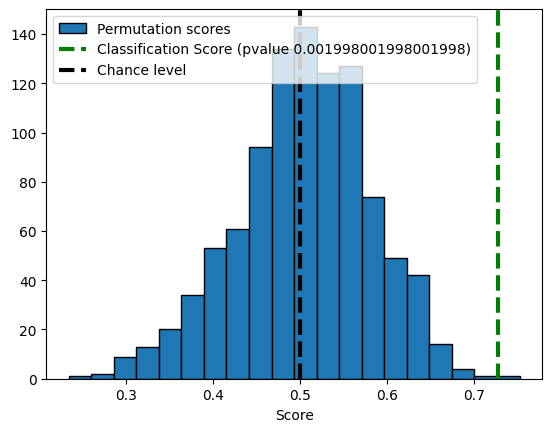

In [ ]:


import numpy as np
import matplotlib.pyplot as plt
#How many classes
n_classes = np.unique(conditions_test).size

plt.hist(scores_perm, 20, label='Permutation scores',
         edgecolor='black')
ylim = plt.ylim()
plt.plot(2 * [score_cv_test], ylim, '--g', linewidth=3,
         label='Classification Score'
         ' (pvalue %s)' % pvalue)
plt.plot(2 * [1. / n_classes], ylim, '--k', linewidth=3, label='Chance level')

plt.ylim(ylim)
plt.legend()
plt.xlabel('Score')

plt.savefig("../plots/05_neg_vs_pos_one_sub_perm.png", dpi=300)
plt.show()